In [368]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [369]:
#Read data 
x_train = pd.read_csv("Train Data.csv")#.to_numpy()
x_test = pd.read_csv("Test Data.csv")#.to_numpy()
y_train = pd.read_csv("Train Labels.csv")
y_test = pd.read_csv("Test Labels.csv")



In [373]:
#x_train = df_scaled_print[0:107]
x_train = x_train.to_numpy()

#x_test = df_scaled_print[107:153]
x_test = x_test.to_numpy()


In [377]:
y_train['Sentiment'] = y_train['Sentiment'].replace(['pos','neg'], [1,0])
y_train = y_train['Sentiment'].values
y_train

y_test['Sentiment'] = y_test['Sentiment'].replace(['pos','neg'], [1,0])
y_test = y_test['Sentiment'].values
y_test

/var/folders/d6/y477syd17zq1xbtppl2_lvkr0000gn/T/ipykernel_92734/3466728297.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train['Sentiment'] = y_train['Sentiment'].replace(['pos','neg'], [1,0])
/var/folders/d6/y477syd17zq1xbtppl2_lvkr0000gn/T/ipykernel_92734/3466728297.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test['Sentiment'] = y_test['Sentiment'].replace(['pos','neg'], [1,0])


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [380]:


## Getting the data loaded and ready


#Data_=tf.keras.datasets.fashion_mnist
## Load the data....
#(x_train, y_train),(x_test, y_test) = Data_.load_data()

## What does the data look like?
print("The first value of x_test is \n", x_test[0])
print("The shape of x_test is \n", x_test.shape)
print("The first value of x_train is \n", x_train[0])
print("The shape of x_train is \n", x_train.shape)
print("The first value of y_test is \n", y_test[0])
print("The shape of y_test is \n", y_test.shape)
print("The first value of y_train is \n", y_train[0])
print("The shape of y_train is \n", y_train.shape)
print("The first few values of y_test are \n", y_test[0:3])

#print("The first value - label - of y-test is a ",y_test[0], "and it looks like this:\n")
#plt.imshow(x_test[0]) ## NOTICE that to see the image you need x_test[0] and to see the
## numeric label you need y_test[0]



The first value of x_test is 
 [ 1  0  0  0  0  0  6  0  0  7  0  1  0  0  0  2  0  2  3  2  0  0  1  1
  0  1  1  4  0  2  0  0  1  2  0  0  0  0  3  0  0  3  0  2  0  1  2  0
  0  0  0  0  0  0  0  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
  0  1  0  0  0  1  1  0  0  0  2  0  1  0  7  0  0  0  2  0  0  1  0  1
  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  2  0  1  0  0  2  0  0  1
  0  0  0  0  0  0  0  2  0  0  0  4  2  9  0  3  0  2  1  2  0  1  0  1
  0  0  2  3  0  4  0  0  0  0  0  3  1  1  0  3  0  5  0  1  0  0  0  1
  2  0  0  1  0  0  0  2  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0  2
  3  0  1  0  0  0  0  0  2  0  0  0  5  8  0  0  1  4  2  0  0  2  0  0
  1  3  1  0  0  1  4  0  1  3  1  1  0  0  3  1  0  2  0  0  0  0  0  0
  0  0  3  8  5  0  0  2  1  1  0  1  0  0  1  2  1  0  2  0  3  0  0  0
  0  1  1  2  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 13  0  1
  0  0  1  0  0  0  0  0  0  0 10  0  0  0  0  0  0  4  1  0  1  0  0  1
 15  0  0  0  0  0  

In [381]:
## Data Normalization
##BEFORE
#print("Before normalization - x_train[0] is \n", x_train[0])
#x_train, x_test = x_train / 255.0, x_test / 255.0
##AFTER
#print("After normalization - x_train[0] is \n", x_train[0])
## NOTE - we DO NOT normalize y. Why not?


In [382]:

## Step 1

## Create a TF - Keras NN Model
    
NN_Model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(400,)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10, activation='softmax') 
])
    
NN_Model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,618 (205.54 KB)

 Trainable params: 52,618 (205.54 KB)

 Non-trainable params: 0 (0.00 B)

In [383]:
## -------
## Step 2 - 
## Compile the Model
## -------
NN_Model.compile(
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam'
                 )


Epoch 1/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1552 - loss: 5.3270 - val_accuracy: 0.6957 - val_loss: 1.3928
Epoch 2/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6589 - loss: 1.7604 - val_accuracy: 0.7826 - val_loss: 1.0885
Epoch 3/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7701 - loss: 0.6975 - val_accuracy: 0.8043 - val_loss: 0.8568
Epoch 4/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7902 - loss: 0.6650 - val_accuracy: 0.8043 - val_loss: 0.8096
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7862 - loss: 0.8431


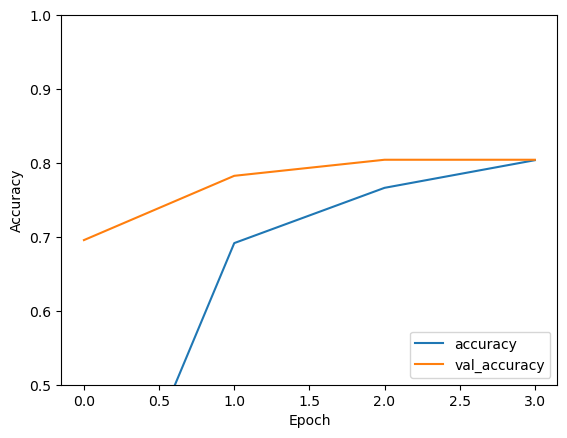

In [384]:
## ----------
## Step 3 - 
## Fit the Model to the data (train the model)
## -------

## Making the number of epochs larger can improve the model and prediction accuracy
Hist=NN_Model.fit(x_train,y_train, epochs=4,validation_data=(x_test, y_test))


###### History and Accuracy
plt.plot(Hist.history['accuracy'], label='accuracy')
plt.plot(Hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

##Test and Model
Test_Loss, Test_Accuracy = NN_Model.evaluate(x_test, y_test)

## Save the Model
#NN_Model.save("MNIST_Example1_NN_Model")


In [385]:

## All predictions
predictions=NN_Model.predict([x_test])
print("All of the predictions for the test data are \n", predictions) ## All the predictions (all 10,000)
print("The single prediction vector for x_test[2] is \n", predictions[2]) ## Just the third prediction
print("The max - final prediction label for x_test[2] is\n", np.argmax(predictions[2])) ## The argmax of the third prediction - this is the label


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
All of the predictions for the test data are 
 [[7.51335919e-03 9.92449403e-01 3.51429215e-08 4.71726844e-06
  3.15657744e-05 5.13857490e-09 2.70585998e-10 9.78761022e-07
  2.90031124e-11 1.25763995e-08]
 [6.10168204e-02 9.38923836e-01 1.44563892e-05 3.61996490e-06
  3.18127204e-05 5.73525494e-06 8.28147364e-08 1.77851973e-06
  8.08915843e-07 1.06897426e-06]
 [3.29986563e-08 1.00000000e+00 8.35881183e-14 9.92988027e-13
  2.94443476e-17 2.40952307e-15 3.07709206e-23 1.33966036e-14
  2.91308712e-16 3.92679077e-19]
 [5.85903898e-02 9.34381664e-01 1.25749182e-04 1.37479987e-03
  2.75938353e-03 1.06054184e-03 4.37406561e-05 1.25385670e-03
  1.78147544e-04 2.31652579e-04]
 [1.69837058e-01 8.20788801e-01 2.49631144e-03 4.22324316e-04
  1.02710736e-03 3.57237877e-04 2.33403873e-04 4.26263083e-03
  1.60389522e-04 4.14712325e-04]
 [1.86493732e-02 9.74771082e-01 2.42347276e-04 7.44589081e-04
  5.10998536e-03 1.19343429e-04 2.58545388e-05 2.53465725e-04
  2.31

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_37
Received: inputs=('Tensor(shape=(32, 400))',)
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_37
Received: inputs=('Tensor(shape=(None, 400))',)
  warnings.warn(msg)


In [386]:
## Print the prediction to compare
#GetPredictedImage=x_test[y_test==np.argmax(predictions[2])][0]
## The above prints the first example that matches the predicted label
#plt.imshow(GetPredictedImage)

In [387]:
## Confusion Matrix and Accuracy - and Visual Options
print("The test accuracy is \n", Test_Accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#print("The prediction accuracy via confusion matrix is:\n")
#print(y_test)
#print(predictions)
#print(predictions.shape)  ##(10000,10)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1)))
#print(Max_Values)
#print(np.argmax([predictions]))
#print(confusion_matrix(y_test, Max_Values))

## Pretty Confusion Matrix
#from sklearn.metrics import confusion_matrix
labels = [0, 1]
cm = confusion_matrix(y_test, Max_Values)#, labels)




The test accuracy is 
 0.804347813129425


In [388]:
predictions

array([[7.51335919e-03, 9.92449403e-01, 3.51429215e-08, 4.71726844e-06,
        3.15657744e-05, 5.13857490e-09, 2.70585998e-10, 9.78761022e-07,
        2.90031124e-11, 1.25763995e-08],
       [6.10168204e-02, 9.38923836e-01, 1.44563892e-05, 3.61996490e-06,
        3.18127204e-05, 5.73525494e-06, 8.28147364e-08, 1.77851973e-06,
        8.08915843e-07, 1.06897426e-06],
       [3.29986563e-08, 1.00000000e+00, 8.35881183e-14, 9.92988027e-13,
        2.94443476e-17, 2.40952307e-15, 3.07709206e-23, 1.33966036e-14,
        2.91308712e-16, 3.92679077e-19],
       [5.85903898e-02, 9.34381664e-01, 1.25749182e-04, 1.37479987e-03,
        2.75938353e-03, 1.06054184e-03, 4.37406561e-05, 1.25385670e-03,
        1.78147544e-04, 2.31652579e-04],
       [1.69837058e-01, 8.20788801e-01, 2.49631144e-03, 4.22324316e-04,
        1.02710736e-03, 3.57237877e-04, 2.33403873e-04, 4.26263083e-03,
        1.60389522e-04, 4.14712325e-04],
       [1.86493732e-02, 9.74771082e-01, 2.42347276e-04, 7.44589081e-04,
   

[Text(0, 0.5, '0:Negative'), Text(0, 1.5, '1:Positive')]

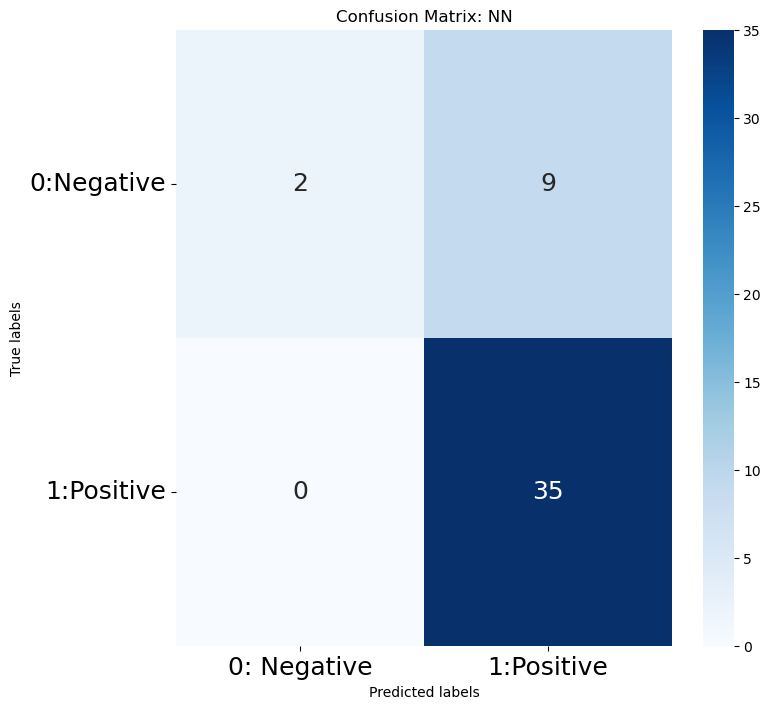

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt     

fig, ax = plt.subplots(figsize=(8,8)) 

sns.heatmap(cm, annot=True, ax=ax, annot_kws={'size': 18}, cmap = 'Blues')

ax.set_ylabel('True labels') 
ax.set_xlabel('Predicted labels')
ax.set_title('Confusion Matrix: NN') 
ax.xaxis.set_ticklabels(["0: Negative","1:Positive"],rotation=0, fontsize = 18)

ax.yaxis.set_ticklabels(["0:Negative","1:Positive"],rotation=0, fontsize = 18)
